In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [4]:
movie_data = pd.read_csv('../ML_Percipio/IMDB-Movie-Data.csv', sep = ',')
print(movie_data.head())

   Rank                    Title                     Genre  \
0     1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1     2               Prometheus  Adventure,Mystery,Sci-Fi   
2     3                    Split           Horror,Thriller   
3     4                     Sing   Animation,Comedy,Family   
4     5            Suicide Squad  Action,Adventure,Fantasy   

                                         Description              Director  \
0  A group of intergalactic criminals are forced ...            James Gunn   
1  Following clues to the origin of mankind, a te...          Ridley Scott   
2  Three girls are kidnapped by a man with a diag...    M. Night Shyamalan   
3  In a city of humanoid animals, a hustling thea...  Christophe Lourdelet   
4  A secret government agency recruits some of th...            David Ayer   

                                              Actors  Year  Runtime (Minutes)  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014                121

In [5]:
movie_data = movie_data.dropna()

In [6]:
movie_data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
len(movie_data)

838

In [8]:
movie_data['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2011     57
2010     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

In [9]:
movie_data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [10]:
from sklearn.preprocessing import Binarizer

In [11]:
bin = Binarizer(threshold=7).fit(movie_data[['Rating']])

In [12]:
bin

Binarizer(copy=True, threshold=7)

In [13]:
bin_x = bin.transform(movie_data[['Rating']])

In [15]:
print(bin_x[0:10,:])

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]


In [18]:
bin_df = pd.DataFrame(data = bin_x, columns=['Binary Rating'])

In [19]:
bin_df.head()

,Binary Rating
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [20]:
movie_data_updated = pd.concat([movie_data, bin_df], axis=1)

In [21]:
movie_data_updated[['Title','Year','Rating','Binary Rating']].head(10)

,Title,Year,Rating,Binary Rating
0,Guardians of the Galaxy,2014.0,8.1,1.0
1,Prometheus,2012.0,7.0,0.0
2,Split,2016.0,7.3,1.0
3,Sing,2016.0,7.2,1.0
4,Suicide Squad,2016.0,6.2,0.0
5,The Great Wall,2016.0,6.1,0.0
6,La La Land,2016.0,8.3,1.0
7,NaN,NaN,NaN,1.0
8,The Lost City of Z,2016.0,7.1,0.0
9,Passengers,2016.0,7.0,1.0


In [22]:
movie_data_updated.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Binary Rating
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179,0.424821
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416,0.494611
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000,1.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000,1.000000


In [23]:
from sklearn.preprocessing import MinMaxScaler

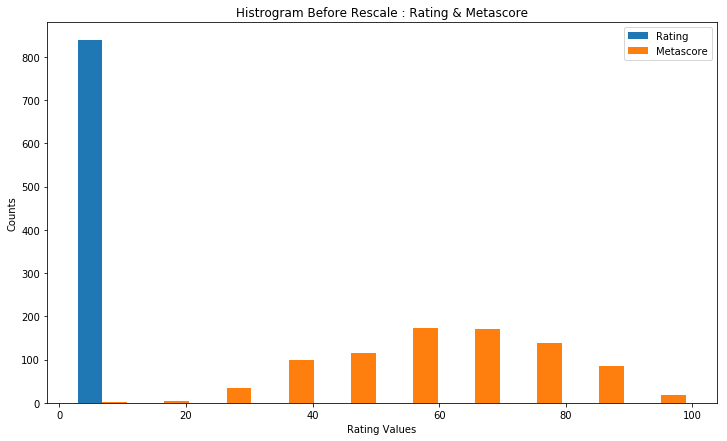

In [31]:
plt.figure(figsize=(12,7))
plt.hist([movie_data.Rating, movie_data.Metascore], bins = 10,label = ("Rating", "Metascore"))
plt.title('Histrogram Before Rescale : Rating & Metascore')
plt.legend(loc = 'best')
plt.xlabel('Rating Values')
plt.ylabel('Counts')
plt.show()


In [33]:
scaler = MinMaxScaler(feature_range=(0,5))
scaler.get_params

<bound method BaseEstimator.get_params of MinMaxScaler(copy=True, feature_range=(0, 5))>

In [34]:
scaler_ratings = scaler.fit_transform(movie_data[['Rating','Metascore']])

In [36]:
np.set_printoptions(precision=3)
print(scaler_ratings[0:5,:])

[[4.366 3.652]
 [3.592 3.034]
 [3.803 2.865]
 [3.732 2.697]
 [3.028 1.629]]


In [38]:
ratings_df = pd.DataFrame(data = scaler_ratings, columns=['ScaledRating', 'ScaledMetascore'])
ratings_df.head()

,ScaledRating,ScaledMetascore
0,4.366197,3.651685
1,3.591549,3.033708
2,3.802817,2.865169
3,3.732394,2.696629
4,3.028169,1.629213


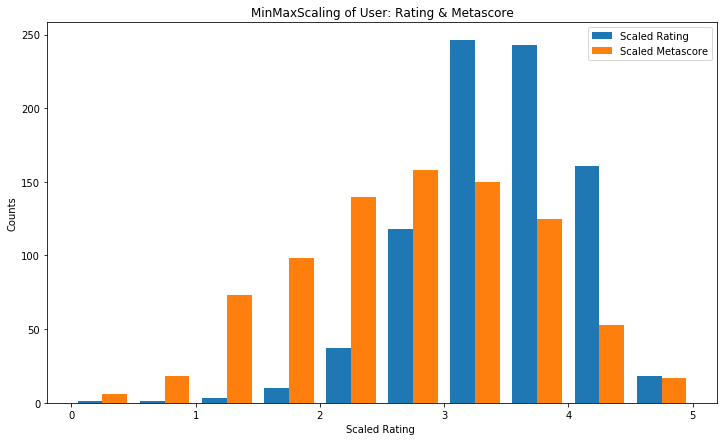

In [41]:
plt.figure(figsize=(12,7))
plt.hist([ratings_df.ScaledRating, ratings_df.ScaledMetascore], bins = 10,label = ("Scaled Rating", "Scaled Metascore"))
plt.title('MinMaxScaling of User: Rating & Metascore')
plt.legend(loc = 'best')
plt.xlabel('Scaled Rating ')
plt.ylabel('Counts')
plt.show()

In [42]:
from sklearn.preprocessing import StandardScaler

In [46]:
movie_data[['Rating','Metascore','Revenue (Millions)']].head()

,Rating,Metascore,Revenue (Millions)
0,8.1,76.0,333.13
1,7.0,65.0,126.46
2,7.3,62.0,138.12
3,7.2,59.0,270.32
4,6.2,40.0,325.02


In [47]:
movie_data[['Rating','Metascore','Revenue (Millions)']].describe()

,Rating,Metascore,Revenue (Millions)
count,838.000000,838.000000,838.000000
mean,6.814320,59.575179,84.564558
std,0.877754,16.952416,104.520227
min,1.900000,11.000000,0.000000
25%,6.300000,47.000000,13.967500
50%,6.900000,60.000000,48.150000
75%,7.500000,72.000000,116.800000
max,9.000000,100.000000,936.630000


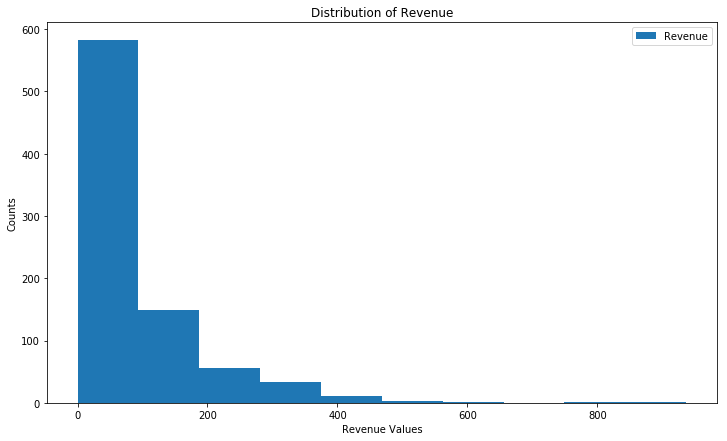

In [48]:
plt.figure(figsize=(12,7))
plt.hist(movie_data['Revenue (Millions)'], bins = 10,label = ("Revenue"))
plt.title('Distribution of Revenue')
plt.xlabel('Revenue Values')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [49]:
scale = StandardScaler().fit(movie_data[['Rating', 'Metascore','Revenue (Millions)']])

In [50]:
scale

StandardScaler(copy=True, with_mean=True, with_std=True)

In [51]:
scale.mean_

array([ 6.814, 59.575, 84.565])

In [52]:
scale.var_

array([7.695e-01, 2.870e+02, 1.091e+04])

In [53]:
scale_x = scale.transform(movie_data[['Rating', 'Metascore','Revenue (Millions)']])

In [55]:
scaled_df = pd.DataFrame(data=scale_x, columns=['ScaledRating','ScaledMetascore','ScaledRevenue'])
scaled_df.head()

,ScaledRating,ScaledMetascore,ScaledRevenue
0,1.465614,0.969456,2.379577
1,0.211666,0.320194,0.401075
2,0.553652,0.143122,0.512699
3,0.439657,-0.033949,1.778281
4,-0.700295,-1.155403,2.301938


In [56]:
scaled_df.describe()

,ScaledRating,ScaledMetascore,ScaledRevenue
count,8.380000e+02,8.380000e+02,8.380000e+02
mean,4.644919e-16,3.338618e-17,-9.658145e-17
std,1.000597e+00,1.000597e+00,1.000597e+00
min,-5.602088e+00,-2.867095e+00,-8.095568e-01
25%,-5.862999e-01,-7.422357e-01,-6.758426e-01
50%,9.767130e-02,2.507458e-02,-3.486053e-01
75%,7.816425e-01,7.333610e-01,3.085976e-01
max,2.491570e+00,2.386029e+00,8.157027e+00


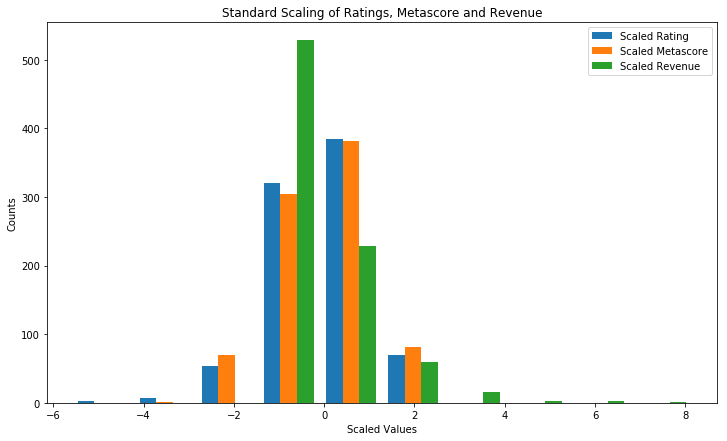

In [57]:
plt.figure(figsize=(12,7))
plt.hist([scaled_df.ScaledRating, scaled_df.ScaledMetascore,scaled_df.ScaledRevenue],
        bins = 10,
        label = ('Scaled Rating', 'Scaled Metascore', 'Scaled Revenue'))
plt.title('Standard Scaling of Ratings, Metascore and Revenue')
plt.xlabel('Scaled Values')
plt.ylabel('Counts')
plt.legend()
plt.show()

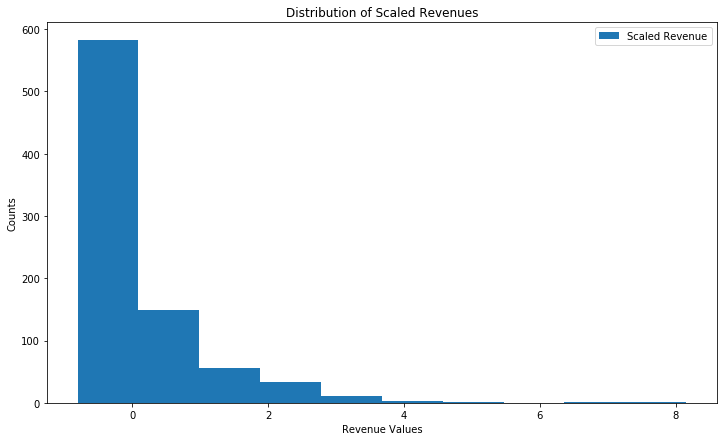

In [58]:
plt.figure(figsize=(12,7))
plt.hist(scaled_df['ScaledRevenue'], bins = 10,label = ("Scaled Revenue"))
plt.title('Distribution of Scaled Revenues')
plt.xlabel('Revenue Values')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Normalizer 

In [59]:
heart_data = pd.read_csv('../ML_Percipio/heart.csv', sep = ',')

In [60]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_data)

303

In [62]:
from sklearn.preprocessing import Normalizer
x = heart_data[['age','trestbps','chol','thalach','oldpeak']]

In [63]:
x.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [64]:
x.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [65]:
array = x.values
array


array([[ 63. , 145. , 233. , 150. ,   2.3],
       [ 37. , 130. , 250. , 187. ,   3.5],
       [ 41. , 130. , 204. , 172. ,   1.4],
       ...,
       [ 68. , 144. , 193. , 141. ,   3.4],
       [ 57. , 130. , 131. , 115. ,   1.2],
       [ 57. , 130. , 236. , 174. ,   0. ]])

In [66]:
scaler = Normalizer().fit(array)

In [68]:
scaler.get_params

<bound method BaseEstimator.get_params of Normalizer(copy=True, norm='l2')>

In [69]:
norm_array = scaler.transform(array)

In [70]:
print(norm_array[0:5,:])

[[0.197 0.454 0.73  0.47  0.007]
 [0.109 0.382 0.735 0.55  0.01 ]
 [0.137 0.434 0.681 0.574 0.005]
 [0.173 0.37  0.729 0.55  0.002]
 [0.138 0.291 0.86  0.396 0.001]]


In [71]:
df = pd.DataFrame(data = norm_array)
column_names = ['age','trestbps','chol','thalach','oldpeak']

In [72]:
df.columns = column_names
df.head(2)

,age,trestbps,chol,thalach,oldpeak
0,0.197466,0.454485,0.730310,0.470156,0.007209
1,0.108753,0.382105,0.734817,0.549643,0.010287


In [73]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.169942,0.410781,0.753608,0.467203,0.003266
std,0.033448,0.061786,0.067924,0.081569,0.003712
min,0.091632,0.191292,0.471035,0.250866,0.000000
25%,0.143389,0.368904,0.711648,0.414632,0.000000
50%,0.169833,0.404571,0.754901,0.470156,0.002286
75%,0.191417,0.454962,0.803349,0.525704,0.005224
max,0.301613,0.622293,0.938161,0.691174,0.022285


In [74]:
round(df,2).head()

,age,trestbps,chol,thalach,oldpeak
0,0.20,0.45,0.73,0.47,0.01
1,0.11,0.38,0.73,0.55,0.01
2,0.14,0.43,0.68,0.57,0.00
3,0.17,0.37,0.73,0.55,0.00
4,0.14,0.29,0.86,0.40,0.00


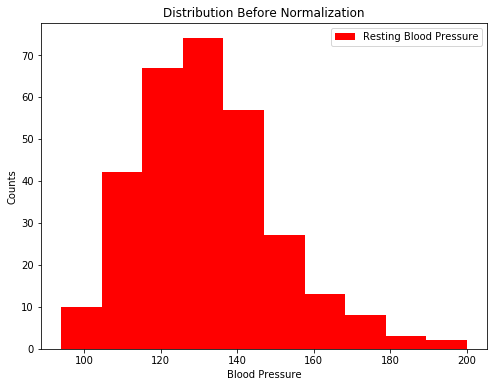

In [77]:
plt.figure(figsize=(8,6))
plt.hist(heart_data['trestbps'], facecolor = 'r',bins = 10, label = 'Resting Blood Pressure')
plt.title('Distribution Before Normalization')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.show()

In [78]:
from sklearn.preprocessing import MaxAbsScaler

In [79]:
scaler = MaxAbsScaler().fit(x)

In [80]:
scaler

MaxAbsScaler(copy=True)

In [81]:
scaler.max_abs_

array([ 77. , 200. , 564. , 202. ,   6.2])

In [82]:
maxabs_x = scaler.transform(x)

In [83]:
print(maxabs_x)

[[0.818 0.725 0.413 0.743 0.371]
 [0.481 0.65  0.443 0.926 0.565]
 [0.532 0.65  0.362 0.851 0.226]
 ...
 [0.883 0.72  0.342 0.698 0.548]
 [0.74  0.65  0.232 0.569 0.194]
 [0.74  0.65  0.418 0.861 0.   ]]


In [84]:
maxabs_df = pd.DataFrame(data=maxabs_x, columns = ['age','trestbps','chol','thalach','oldpeak'])

In [85]:
maxabs_df.head()

,age,trestbps,chol,thalach,oldpeak
0,0.818182,0.725,0.413121,0.742574,0.370968
1,0.480519,0.650,0.443262,0.925743,0.564516
2,0.532468,0.650,0.361702,0.851485,0.225806
3,0.727273,0.600,0.418440,0.881188,0.129032
4,0.740260,0.600,0.627660,0.806931,0.096774


In [86]:
maxabs_df.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.706056,0.658119,0.436638,0.740826,0.167678
std,0.117949,0.087691,0.091898,0.113392,0.187270
min,0.376623,0.470000,0.223404,0.351485,0.000000
25%,0.616883,0.600000,0.374113,0.660891,0.000000
50%,0.714286,0.650000,0.425532,0.757426,0.129032
75%,0.792208,0.700000,0.486702,0.821782,0.258065
max,1.000000,1.000000,1.000000,1.000000,1.000000


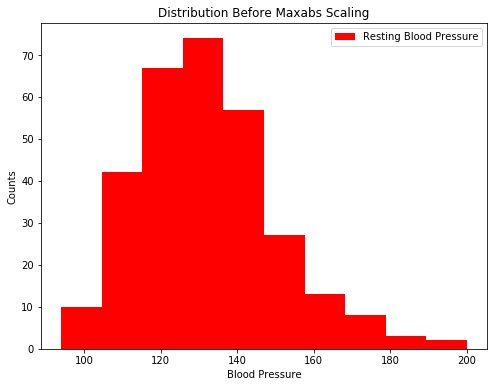

In [87]:
plt.figure(figsize=(8,6))
plt.hist(heart_data['trestbps'], facecolor = 'r',bins = 10, label = 'Resting Blood Pressure')
plt.title('Distribution Before Maxabs Scaling')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.show()

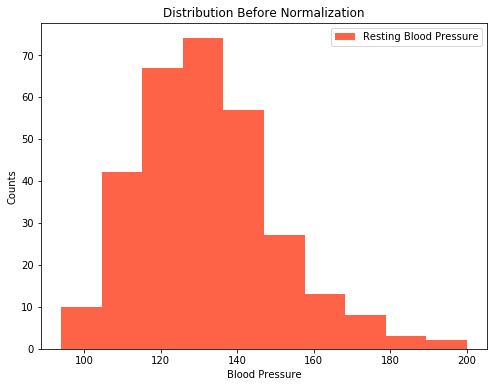

In [88]:
plt.figure(figsize=(8,6))
plt.hist(heart_data['trestbps'], facecolor = 'tomato',bins = 10, label = 'Resting Blood Pressure')
plt.title('Distribution Before Normalization')
plt.xlabel('Blood Pressure')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.show()

# Label Encoding

In [91]:
income_data = pd.read_csv('../ML_Percipio/adult.csv',na_values= '?', sep=',')

In [90]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [95]:
len(income_data)

48842

In [96]:
income_data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [97]:
# Unique Values in this data

In [98]:
income_data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [99]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [102]:
# It will transfer the string value type from marital_status column to Numeric Values

income_data['marital-status'] = leb.fit_transform(income_data['marital-status'])

In [101]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,4,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,2,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,2,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,2,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,4,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [103]:
income_data['marital-status'].unique()

array([4, 2, 6, 0, 5, 3, 1], dtype=int64)

In [104]:
# Inverse the Label Encoding
income_data['marital-status'] = leb.inverse_transform(income_data['marital-status'])

In [105]:
# Label encoding is not best to use for more than 2 columns because it can not distiguish the situation acoording to the requirement of the problem

In [106]:
income_data['income'] = leb.fit_transform(income_data['income'])

In [107]:
income_data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,4,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,2,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,2,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,2,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,NaN,103497,Some-college,10,4,NaN,Own-child,White,Female,0,0,30,United-States,0


# One Hot Encoding

In [108]:
# to over come the previous situation. It input feature have more than 2 features

In [109]:
pd.get_dummies(income_data["workclass"])

,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0
8,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0


In [110]:
from sklearn.preprocessing import MinMaxScaler
print (MinMaxScaler(feature_range=(0, 5)).fit_transform ([[1], [2], [3], [4], [5]]))

[[0.  ]
 [1.25]
 [2.5 ]
 [3.75]
 [5.  ]]


In [111]:
from sklearn.preprocessing import Binarizer
print (Binarizer(threshold=3). fit_transform ([[1], [2], [3], [4], [5], [6]]))

[[0]
 [0]
 [0]
 [1]
 [1]
 [1]]
